In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [19]:
df=pd.read_csv('dataset_guardado.csv')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Time segment       192 non-null    int64
 1   Holiday            192 non-null    int64
 2   Weekend Exit       192 non-null    int64
 3   Season             192 non-null    int64
 4   Weekend Return     192 non-null    int64
 5   Number             192 non-null    int64
 6   Exceeds Threshold  192 non-null    int64
dtypes: int64(7)
memory usage: 10.6 KB


In [20]:
X = df[['Time segment', 'Holiday', 'Weekend Exit', 'Season', 'Weekend Return']]
y=df['Exceeds Threshold']

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [21]:
# Suponiendo que deseas mapear 'Yes' a 1 y 'No' a 0 en la columna 'Exceeds Threshold'
mapeo = {'Yes': 1, 'No': 0}
df['Exceeds Threshold'] = df['Exceeds Threshold'].map(mapeo)
df['Weekend Exit'] = df['Weekend Exit'].map(mapeo)
df['Holiday'] = df['Holiday'].map(mapeo)
df['Weekend Return'] = df['Weekend Return'].map(mapeo)
mapi= {'6-10': 0, '10-14': 1, '14-18': 2, '18-22': 3, '22-2': 4, '2-6': 5}
df['Time segment'] = df['Time segment'].map(mapi)
mapis= {'Winter': 0, 'Spring': 1, 'Summer': 2, 'Fall': 3}
df['Season'] = df['Season'].map(mapis)

In [22]:
X = df[['Time segment', 'Holiday', 'Weekend Exit', 'Season', 'Weekend Return']]
y=df['Exceeds Threshold']

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [24]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)

Model accuracy score with criterion entropy: 0.9375


[Text(0.625, 0.875, 'x[4] <= 0.5\nentropy = 0.625\nsamples = 128\nvalue = [108, 20]'),
 Text(0.5, 0.625, 'x[1] <= 0.5\nentropy = 0.885\nsamples = 66\nvalue = [46, 20]'),
 Text(0.25, 0.375, 'x[0] <= 4.5\nentropy = 0.999\nsamples = 35\nvalue = [17, 18]'),
 Text(0.125, 0.125, 'entropy = 0.94\nsamples = 28\nvalue = [10, 18]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.75, 0.375, 'x[2] <= 0.5\nentropy = 0.345\nsamples = 31\nvalue = [29, 2]'),
 Text(0.625, 0.125, 'entropy = 0.523\nsamples = 17\nvalue = [15, 2]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 62\nvalue = [62, 0]')]

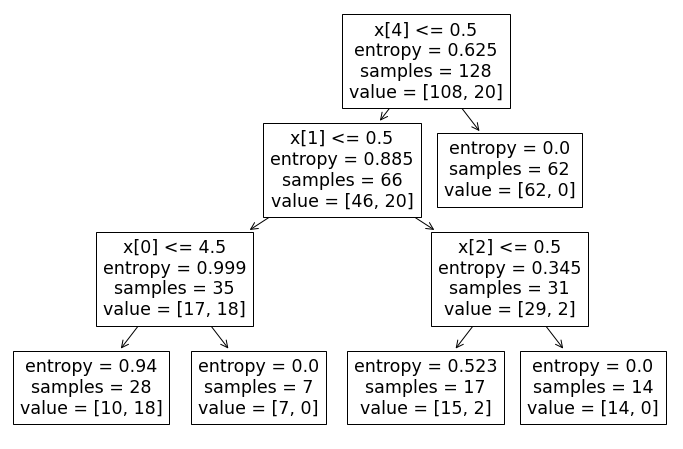

In [25]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train))

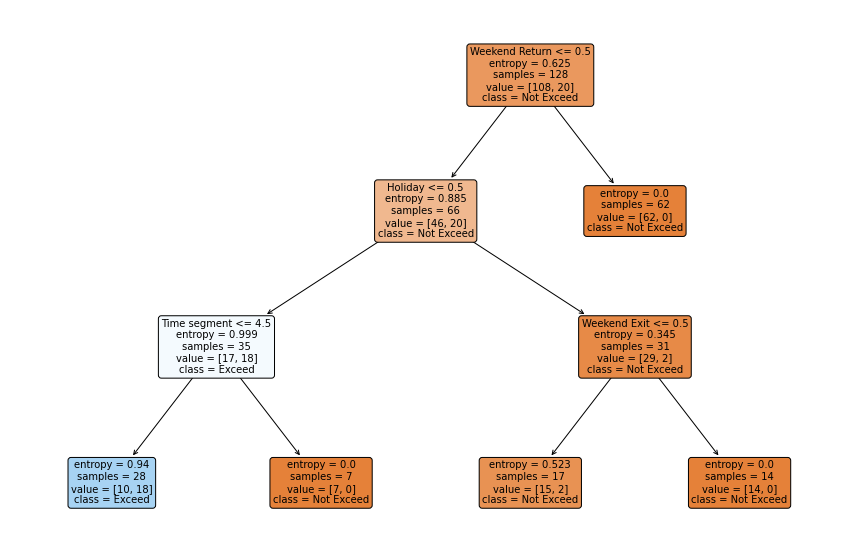

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Configura el tamaño del gráfico
plt.figure(figsize=(15, 10))

# Visualiza el árbol
plot_tree(clf_en, feature_names=X.columns, class_names=['Not Exceed', 'Exceed'], filled=True, rounded=True, fontsize=10)

# Muestra el gráfico
plt.show()



In [32]:
from sklearn.metrics import accuracy_score

# Predicciones en el conjunto de prueba
y_pred_en = clf_en.predict(X_test)

# Calcular y mostrar la precisión
accuracy = accuracy_score(y_test, y_pred_en)
print('Model accuracy score: {0:0.4f}'.format(accuracy))


Model accuracy score: 0.9375


In [33]:
from sklearn.metrics import roc_auc_score
auc_roc = roc_auc_score(y_test, clf_en.predict_proba(X_test)[:, 1])
print('AUC-ROC Score: {0:0.4f}'.format(auc_roc))


AUC-ROC Score: 0.9639


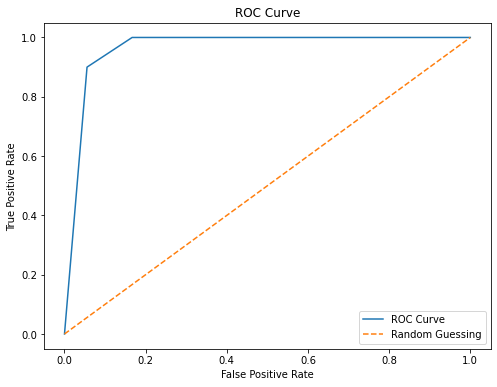

In [34]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, clf_en.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
